In [1]:
%%capture storage
# The above redirects all output of the below commands to the variable 'storage' instead of displaying it.
# It can be viewed by typing: 'storage()'
# Setting up worksheet and importing equations for explicit leaf energy balance
load('temp/Worksheet_setup.sage')
load_session('temp/leaf_enbalance_eqs.sobj')
fun_loadvars()   # re-loading variable definitions

<h1>Consideration of heat transfer between two leaf sides</h1>
<p>If one side of the leaf is illuminated only, or if transpiration happens on one side only, there would be a heat flux from one side of the leaf to the other, requiring a temperature gradient. How big would the temperature gradient be for typical leaves and would decoupling of leaf temperatures between both sides affect the fluxes?</p>

In [2]:
var2('E_lu', 'Latent heat flux from upper side of leaf', joule/second/meter^2, latexname = 'E_{l_u}')
var2('E_ll', 'Latent heat flux from lower side of leaf', joule/second/meter^2, latexname = 'E_{l_l}')
var2('h_cu', 'Sensible heat flux coefficient on upper leaf side', joule/(kelvin*meter^2*second), latexname = 'h_{c_u}')
var2('h_cl', 'Sensible heat flux coefficient on lower leaf side', joule/(kelvin*meter^2*second), latexname = 'h_{c_l}')
var2('g_swu', 'Stomatal conductance to water vapour on upper side',  meter/second, latexname = 'g_{sw_u}')
var2('g_swl', 'Stomatal conductance to water vapour on lower side',  meter/second, latexname = 'g_{sw_l}')
var2('H_lu', 'Sensible heat flux from upper side of leaf', joule/second/meter^2, latexname = 'H_{l_u}')
var2('H_ll', 'Sensible heat flux from lower side of leaf', joule/second/meter^2, latexname = 'H_{l_l}')
var2('R_llu', 'Longwave heat flux from upper side of leaf', joule/second/meter^2, latexname = 'R_{ll_u}')
var2('R_lll', 'Longwave heat flux from lower side of leaf', joule/second/meter^2, latexname = 'R_{ll_l}')


var2('Q_l', 'Conductive heat flux from upper to lower side of leaf', joule/second/meter^2)
var2('k_l', 'Thermal conductivity of a fresh leaf', joule/second/meter/kelvin)  # between 0.268 and 0.573 according to Hays_1975_The_thermal.pdf
var2('T_lu', 'Leaf surface temperature of upper side', kelvin, latexname = 'T_{l_u}')
var2('T_ll', 'Leaf surface temperature of lower side', kelvin, latexname = 'T_{l_l}')
var2('z_l', 'Leaf thickness (m)',meter)

z_l

In [3]:
eq_Ql = Q_l == k_l*(T_lu - T_ll)/z_l
print units_check(eq_Ql)
print latex(eq_Ql)
eq_Tlu_Ql = solve(eq_Ql, T_lu)[0]
print units_check(eq_Tlu_Ql)

Q_l == -(T_ll - T_lu)*k_l/z_l

kilogram/second^3 == kilogram/second^3
Q_{l} = -\frac{{\left({T_{l_l}} - {T_{l_u}}\right)} k_{l}}{z_{l}}


T_lu == (T_ll*k_l + Q_l*z_l)/k_l

kelvin == kelvin


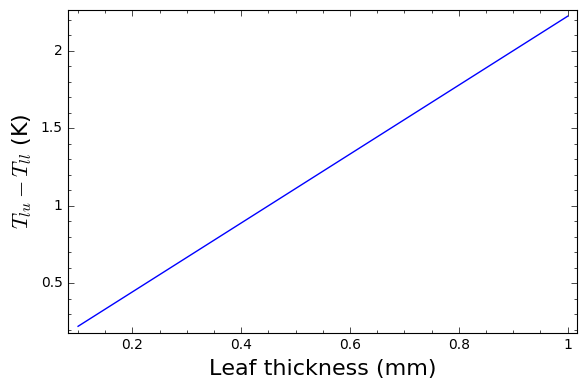

In [4]:
var('dummy')
vdict = cdict.copy()
vdict[T_ll] = 300
vdict[k_l] = 0.27
vdict[Q_l] = 600
P = plot(eq_Tlu_Ql.rhs().subs(vdict)(z_l = 1e-3*dummy) - vdict[T_ll], (z_l, 0.1, 1), frame = True)
P.axes_labels(['Leaf thickness (mm)', '$T_{lu} - T_{ll}$ (K)'])
P

In [5]:
# Energy balance of the upper and lower sides of leaf
eq_enbalTlu = R_s - E_lu - H_lu - R_llu - Q_l
eq_enbalTll = Q_l - E_ll - H_ll - R_lll

In [6]:
eq_Hlu = H_lu == h_cu*(T_lu - T_a)
print units_check(eq_Hlu)
eq_Hll = H_ll == h_cl*(T_ll - T_a)
print units_check(eq_Hll)

H_lu == -(T_a - T_lu)*h_cu

kilogram/second^3 == (T_a^2 - T_lu)*kilogram/((T_a - T_lu)*second^3)


H_ll == -(T_a - T_ll)*h_cl

kilogram/second^3 == (T_a^2 - T_ll)*kilogram/((T_a - T_ll)*second^3)


In [7]:
# for forced convection, h_cu=h_cl=h_c
eq_hcu = eq_hc(h_c = h_cu)
print units_check(eq_hcu)
eq_hcl = eq_hc(h_c = h_cl)
print units_check(eq_hcu)

h_cu == Nu*k_a/L_l

kilogram/(kelvin*second^3) == Nu*k_a*kilogram/(L_l*kelvin*second^3)


h_cu == Nu*k_a/L_l

kilogram/(kelvin*second^3) == Nu*k_a*kilogram/(L_l*kelvin*second^3)


In [8]:
# R_ll is given by eq_Rll with a_sh=1 and replacing T_l
eq_Rllu = eq_Rll(R_ll = R_llu, a_sh = 1, T_l = T_lu)
eq_Rlll = eq_Rll(R_ll = R_lll, a_sh = 1, T_l = T_ll)
print units_check(eq_Rllu)
print units_check(eq_Rlll)

R_llu == (T_lu^4 - T_w^4)*epsilon_l*sigm

kilogram/second^3 == -(T_w^8 - T_lu^4)*epsilon_l*kilogram*sigm/((T_lu^4 - T_w^4)*second^3)


R_lll == (T_ll^4 - T_w^4)*epsilon_l*sigm

kilogram/second^3 == -(T_w^8 - T_ll^4)*epsilon_l*kilogram*sigm/((T_ll^4 - T_w^4)*second^3)


In [9]:
print docdict[a_s]
print docdict[h_c]

Fraction of one-sided leaf area covered by stomata (1 if stomata are on one side only, 2 if they are on both sides)
Average 1-sided convective transfer coefficient


In [10]:
eq_Cwl.subs(eq_Pwl)

C_wl == 611*e^(-1/273*M_w*lambda_E*(273/T_l - 1)/R_mol)/(R_mol*T_l)

In [11]:
# E_lu depends on upper side Elmol, with eq_gbw_ch and a_s=1 and g_swu
eq_Elu = E_lu == eq_El.rhs().subs(eq_Elmol).subs(eq_gtw).subs(g_sw == g_swu, eq_gbw_hc(h_c=h_cu,a_s=1)).subs(eq_Cwl.subs(eq_Pwl)(T_l = T_lu)).simplify_full()
eq_Elu.show()

E_lu == -(C_wa*M_w*R_mol*T_lu*g_swu*h_cu*lambda_E*e^(M_w*lambda_E/(R_mol*T_lu)) - 611*M_w*g_swu*h_cu*lambda_E*e^(1/273*M_w*lambda_E/R_mol))/(Le^(2/3)*R_mol*T_lu*c_pa*g_swu*rho_a*e^(M_w*lambda_E/(R_mol*T_lu)) + R_mol*T_lu*h_cu*e^(M_w*lambda_E/(R_mol*T_lu)))

In [12]:
# E_ll depends on lower side Elmol, with eq_gbw_ch and a_s=1 and g_swu
eq_Ell = E_ll == eq_El.rhs().subs(eq_Elmol).subs(eq_gtw).subs(g_sw == g_swl, eq_gbw_hc(h_c=h_cl,a_s=1)).subs(eq_Cwl.subs(eq_Pwl)(T_l = T_ll)).simplify_full()
eq_Ell.show()

E_ll == -(C_wa*M_w*R_mol*T_ll*g_swl*h_cl*lambda_E*e^(M_w*lambda_E/(R_mol*T_ll)) - 611*M_w*g_swl*h_cl*lambda_E*e^(1/273*M_w*lambda_E/R_mol))/(Le^(2/3)*R_mol*T_ll*c_pa*g_swl*rho_a*e^(M_w*lambda_E/(R_mol*T_ll)) + R_mol*T_ll*h_cl*e^(M_w*lambda_E/(R_mol*T_ll)))

In [13]:
eq_Ell.show()

E_ll == -(C_wa*M_w*R_mol*T_ll*g_swl*h_cl*lambda_E*e^(M_w*lambda_E/(R_mol*T_ll)) - 611*M_w*g_swl*h_cl*lambda_E*e^(1/273*M_w*lambda_E/R_mol))/(Le^(2/3)*R_mol*T_ll*c_pa*g_swl*rho_a*e^(M_w*lambda_E/(R_mol*T_ll)) + R_mol*T_ll*h_cl*e^(M_w*lambda_E/(R_mol*T_ll)))

In [14]:
from scipy.optimize import fsolve
def fun_SS1(vdict1):
    '''
    Steady-state T_lu, T_ll, R_lll, R_llu, H_ll, H_lu, E_lu and E_ll under forced conditions.
    Parameters are given in a dictionary (vdict) with the following entries:
    a_s, a_sh, L_l, P_a, P_wa, R_s, Re_c, T_a, g_swu, g_swl, v_w
    ''' 
    vdict = vdict1.copy()

    vdict[C_wa] = eq_Cwl.rhs()(P_wl = P_wa, T_l = T_a).subs(vdict)
    vdict[nu_a] = eq_nua.rhs().subs(vdict)
    vdict[Re] = eq_Re.rhs().subs(vdict)
    vdict[Nu] = eq_Nu_forced_all.rhs().subs(vdict)
    vdict[k_a] = eq_ka.rhs().subs(vdict)
    vdict[h_cu] = eq_hcu.rhs().subs(vdict)
    vdict[h_cl] = eq_hcl.rhs().subs(vdict)
    vdict[alpha_a] = eq_alphaa.rhs().subs(vdict)
    vdict[D_va] = eq_Dva.rhs().subs(vdict)
    vdict[Le] =  eq_Le.rhs().subs(vdict)
    vdict[P_N2] = eq_PN2.rhs().subs(vdict)
    vdict[P_O2] = eq_PO2.rhs().subs(vdict)
    vdict[rho_a] =  eq_rhoa_Pwa_Ta.rhs().subs(vdict)
        
    eq1 = eq_enbalTlu.subs(eq_Elu, eq_Hlu, eq_Ql, eq_Rllu).subs(vdict)
    eq2 = eq_enbalTll.subs(eq_Ell, eq_Hll, eq_Ql, eq_Rlll).subs(vdict)
    def ff(v):
        T_lu, T_ll = map(float, v)
        return [eq1(T_lu=T_lu, T_ll=T_ll), eq2(T_lu=T_lu, T_ll=T_ll)]
    
    try:
        soln = fsolve(ff, [300, 300])
    except: 
        print 'too many unknowns for finding T_ll and T_lu: ' + str(eq1(T_lu=T_lu, T_ll=T_ll).args()) + '; ' + str(eq2(T_lu=T_lu, T_ll=T_ll).args())
    
    
    vdict[T_lu] = soln[0]
    vdict[T_ll] = soln[1]
    vdict[Q_l] = eq_Ql.rhs().subs(vdict)
    vdict[E_lu] = eq_Elu.rhs().subs(eq_Pwl(T_l = T_lu)).subs(vdict)
    vdict[E_ll] = eq_Ell.rhs().subs(eq_Pwl(T_l = T_ll)).subs(vdict)
    vdict[H_lu] = eq_Hlu.rhs().subs(vdict)
    vdict[H_ll] = eq_Hll.rhs().subs(vdict)
    vdict[R_llu] = eq_Rllu.rhs().subs(vdict)
    vdict[R_lll] = eq_Rlll.rhs().subs(vdict)

    
    # Test for steady state
    eq1 = eq_enbalTlu
    if n(eq1.subs(vdict))>1.:
        return 'error in energy balance: ' + str(eq1) + ' = ' + str(n(eq1.subs(vdict))) 
    eq1 = eq_enbalTll
    if n(eq1.subs(vdict))>1.:
        return 'error in energy balance: ' + str(eq1) + ' = ' + str(n(eq1.subs(vdict))) 
    
    eq1 = R_s - R_llu - R_lll - H_lu - H_ll - E_lu - E_ll
    if n(eq1.subs(vdict))>1.:
        return 'error in energy balance: ' + str(eq1) + ' = ' + str(n(eq1.subs(vdict)))     
            
    return vdict

In [15]:
# Leaf thickness 0.4 mm, wet paper, realistic thermal conductance, darkness
vdict = cdict.copy()
vdict[k_l] = 0.3  # between 0.268 and 0.573 according to Hays_1975_The_thermal.pdf
vdict[z_l] = 0.0005  # 0.5 mm thick leaf
vdict[a_s] = 1.0    # one sided stomata
vdict[g_swl] = 0.01 
vdict[g_swu] = 0.
vdict[T_a] = 273 + 25.5
vdict[T_w] = vdict[T_a] # Wall temperature equal to air temperature
vdict[P_a] = 101325
rha = 0.3
vdict[P_wa] = rha*eq_Pwl.rhs()(T_l = T_a).subs(vdict)
vdict[L_l] = 0.03
#vdict[L_A] = vdict[L_l]^2
vdict[Re_c] = 3000
vdict[R_s] = 600.
#vdict[Q_in] = 0
vdict[v_w] = 0.5

resdict = fun_SS1(vdict)
vdict[z_l] = 1e-12   # setting z_l close to 0 should result in isothermal conditions
resdict_iso = fun_SS1(vdict)
print 'T_lu - T_ll: ' + str(resdict[T_lu] - resdict[T_ll])
print 'E_ll: ' + str(resdict[E_ll])
print 'isothermal: '
print 'T_lu - T_ll: ' + str(resdict_iso[T_lu] - resdict_iso[T_ll])
print 'E_ll: ' + str(resdict_iso[E_ll])

T_lu - T_ll: 0.778885052219
E_ll: 353.4854162257405
isothermal: 
T_lu - T_ll: 1.59991486726e-09
E_ll: 359.9289491588024


# Saving definitions to separate file
In the below, we save the definitions and variables to a separate file in the /temp directory with the extension .sobj.

In [16]:
save_session('temp/leaf_enbalance2s_eqs')

# Table of symbols and units

In [17]:
def fun_units_formatted(variable):
    '''
    Returns units of variable expanded to exponential notation.
    
    '''
    units1 = (udict[eval(variable)]/eval(variable)).subs(subsdict)
    facs = units1.factor_list()
    str1 = ''
    for term1 in facs:
        str1 = str1 +' ' + str(term1[0])
        op1 = term1[1]
        if op1!=1:
            str1 = str1 + '^{' + str(op1) + '} '
    return '$'+str1+'$'

# Creating dictionary to substitute names of units with shorter forms
var('m s J Pa K kg mol')
subsdict = {meter: m, second: s, joule: J, pascal: Pa, kelvin: K, kilogram: kg, mole: mol}
var('N_Re N_Re_c N_Le N_Nu N_Gr')
dict_varnew = {Re: N_Re, Re_c: N_Re_c, Le: N_Le, Nu: N_Nu, Gr: N_Gr}
dict_varold = {v: k for k, v in dict_varnew.iteritems()}
variables = sorted([str(variable.subs(dict_varnew)) for variable in udict.keys()],key=str.lower)
tableheader = [('Variable', 'Description (value)', 'Units')]
tabledata = [('Variable', 'Description (value)', 'Units')]
for variable1 in variables:
    variable2 = eval(variable1).subs(dict_varold)
    variable = str(variable2)
    tabledata.append((eval(variable),docdict[eval(variable)],fun_units_formatted(variable)))
#tabledata = [(str(latex(eval(variable))),docdict[eval(variable)],fun_units_formatted(variable)) for variable in variables]
table(tabledata, header_row=True)

Variable,Description (value),Units
,"Fraction of one-sided leaf area covered by stomata (1 if stomata are on one side only, 2 if they are on both sides)",
,Fraction of projected area exchanging sensible heat with the air (2),
,Thermal diffusivity of dry air,
,Specific heat of dry air (1010),
,Concentration of water in the free air,
,Concentration of water in the leaf air space,
,Binary diffusion coefficient of water vapour in air,
,Latent heat flux from leaf,
,Latent heat flux from lower side of leaf,
,Transpiration rate in molar units,


In [18]:
latex(table(tabledata))

\begin{tabular}{lll}
Variable & Description (value) & Units \\
${a_{s}}$ & Fraction of one-sided leaf area covered by stomata (1 if stomata are on one side only, 2 if they are on both sides) & $ a_s$ \\
${{a_{sh}}}$ & Fraction of projected area exchanging sensible heat with the air (2) & $ a_sh$ \\
${\alpha_{a}}$ & Thermal diffusivity of dry air & $ alpha_a m^{2}  s^{-1} $ \\
${{c_{pa}}}$ & Specific heat of dry air (1010)  & $ J K^{-1}  c_pa kg^{-1} $ \\
${{C_{wa}}}$ & Concentration of water in the free air  & $ C_wa m^{-3}  mol$ \\
${{C_{wl}}}$ & Concentration of water in the leaf air space  & $ C_wl m^{-3}  mol$ \\
${{D_{va}}}$ & Binary diffusion coefficient of water vapour in air & $ D_va m^{2}  s^{-1} $ \\
${E_{l}}$ & Latent heat flux from leaf & $ E_l J m^{-2}  s^{-1} $ \\
${E_{l_l}}$ & Latent heat flux from lower side of leaf & $ J m^{-2}  s^{-1} $ \\
${{E_{l,mol}}}$ & Transpiration rate in molar units & $ E_lmol m^{-2}  mol s^{-1} $ \\
${E_{l_u}}$ & Latent heat flux from upper s